In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\ameys\Desktop\Projects\Phishing URL Predictor\dataset\UCI_dataset.csv")


In [26]:
df = df[['Prefix_Suffix',
        'having_Sub_Domain',
        'SSLfinal_State',
        'Request_URL',
        'URL_of_Anchor',
        'web_traffic',
        'Result']]

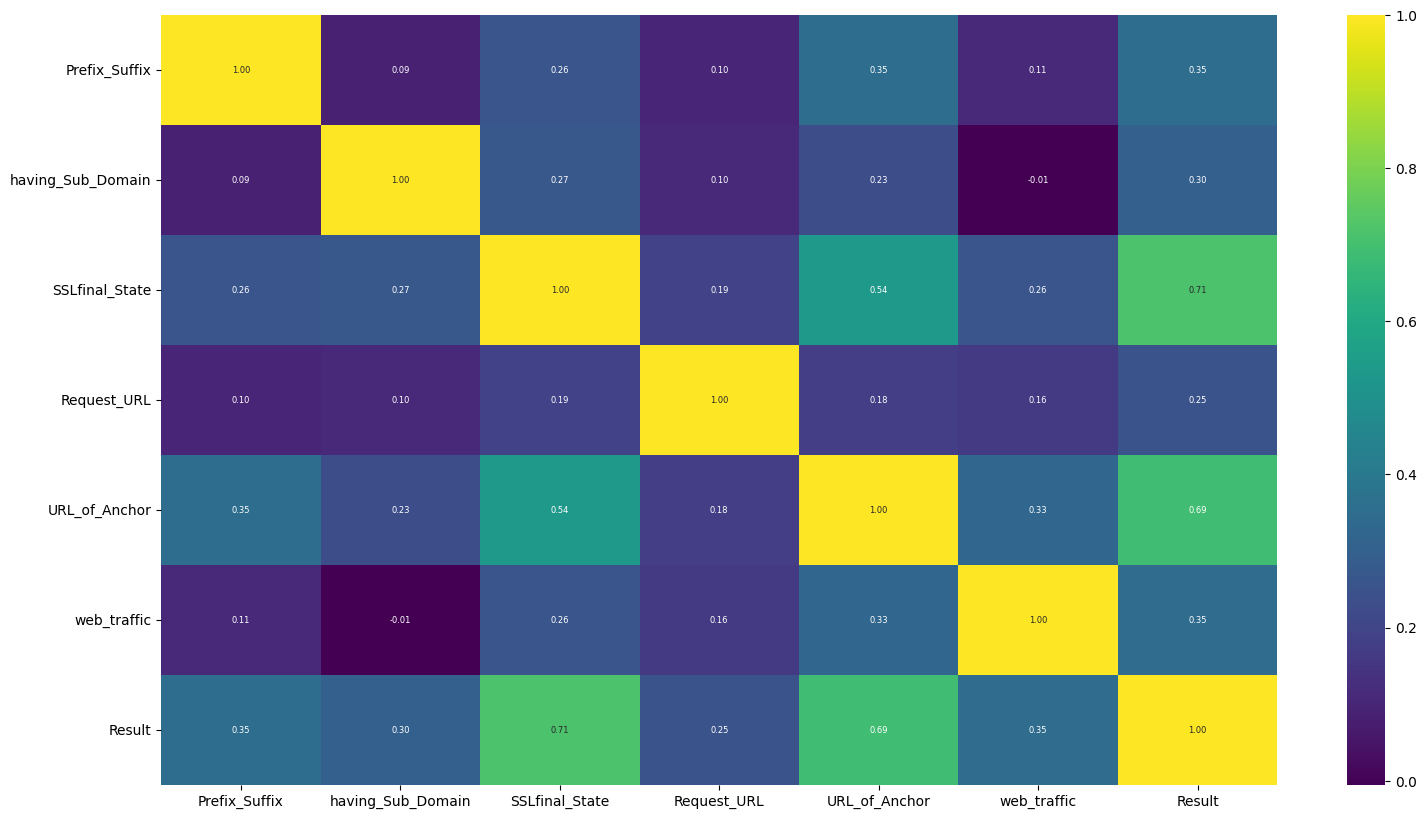

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(df.corr(), 
                      
                      annot=True, 
                      fmt=".2f", 
                      annot_kws={"size": 6},  # Increase annotation font size
                      cmap='viridis')         # Optional: change color scheme



plt.show()

In [4]:
X = df.drop(['Result','Links_in_tags','Domain_registeration_length','SFH','age_of_domain','DNSRecord','Page_Rank','Google_Index','having_IP_Address', 'URL_Length','Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Favicon', 'port', 'HTTPS_token', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'Links_pointing_to_page','Statistical_report'], axis = 1)
y = df['Result']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}") 

Features shape: (11055, 6)
Target shape: (11055,)


In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=10)



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np


In [17]:
models = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    XGBClassifier(
        n_estimators=186,
        learning_rate=0.17540108887868971, 
        max_depth=5, 
        min_child_weight=1, 
        subsample=0.7256690687623746, 
        colsample_bytree=0.8196526102180001, 
        gamma=0.010950425456138637, 
        alpha=0
    )
]

for model in models:
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(f'Train accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test accuracy: {accuracy_score(y_test, y_test_pred)}')
    print('\n--------------------------------\n')

LogisticRegression
Train accuracy: 0.9167743602998191
Test accuracy: 0.9080494422671088

--------------------------------

GaussianNB
Train accuracy: 0.5779271129490825
Test accuracy: 0.5700934579439252

--------------------------------

KNeighborsClassifier
Train accuracy: 0.920263634013957
Test accuracy: 0.9104612601748568

--------------------------------

DecisionTreeClassifier
Train accuracy: 0.9365469113466012
Test accuracy: 0.9297558034368405

--------------------------------

RandomForestClassifier
Train accuracy: 0.9365469113466012
Test accuracy: 0.9270425082906241

--------------------------------

AdaBoostClassifier
Train accuracy: 0.9232359782889635
Test accuracy: 0.9216159179981911

--------------------------------

GradientBoostingClassifier
Train accuracy: 0.9306022227965882
Test accuracy: 0.9258365993367501

--------------------------------

SVC
Train accuracy: 0.9259498578444042
Test accuracy: 0.9198070545673802

--------------------------------

XGBClassifier
Train ac

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# List of models
models = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),

    SVC(),
    XGBClassifier(
        n_estimators=186,
        learning_rate=0.17540108887868971, 
        max_depth=5, 
        min_child_weight=1, 
        subsample=0.7256690687623746, 
        colsample_bytree=0.8196526102180001, 
        gamma=0.010950425456138637, 
        alpha=0
    )
]

# Split dataset (assuming X, y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models and evaluate
for model in models:
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics Calculation
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')  # Weighted for imbalanced classes
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Sensitivity (Recall for positive class)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1)  # Sensitivity = Recall for class 1

    # Print results
    print(f"\nModel: {model.__class__.__name__}")

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity (Recall for Class 1): {sensitivity:.4f}")
    print("\n" + "-"*40)



Model: LogisticRegression
Test Accuracy: 0.8550
Precision: 0.8623
Recall (Weighted): 0.8550
F1 Score: 0.8550
Sensitivity (Recall for Class 1): 0.8037

----------------------------------------

Model: GaussianNB
Test Accuracy: 0.7950
Precision: 0.8144
Recall (Weighted): 0.7950
F1 Score: 0.7939
Sensitivity (Recall for Class 1): 0.7009

----------------------------------------

Model: KNeighborsClassifier
Test Accuracy: 0.8100
Precision: 0.8201
Recall (Weighted): 0.8100
F1 Score: 0.8098
Sensitivity (Recall for Class 1): 0.7477

----------------------------------------

Model: DecisionTreeClassifier
Test Accuracy: 0.8550
Precision: 0.8575
Recall (Weighted): 0.8550
F1 Score: 0.8552
Sensitivity (Recall for Class 1): 0.8318

----------------------------------------

Model: RandomForestClassifier
Test Accuracy: 0.8900
Precision: 0.8988
Recall (Weighted): 0.8900
F1 Score: 0.8900
Sensitivity (Recall for Class 1): 0.8318

----------------------------------------

Model: AdaBoostClassifier
Test A

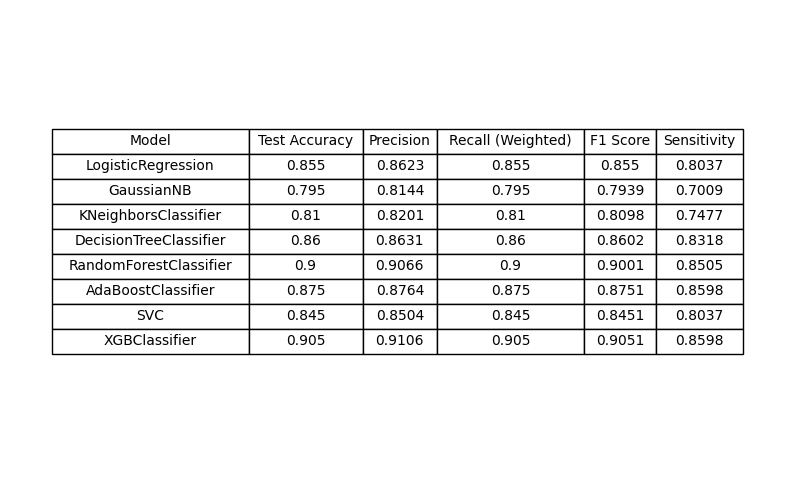

In [24]:
import matplotlib.pyplot as plt

# Data for the table
models = [
    "LogisticRegression", "GaussianNB", "KNeighborsClassifier",
    "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier",
    "SVC", "XGBClassifier"
]

test_accuracy = [0.8550, 0.7950, 0.8100, 0.8600, 0.9000, 0.8750, 0.8450, 0.9050]
precision = [0.8623, 0.8144, 0.8201, 0.8631, 0.9066, 0.8764, 0.8504, 0.9106]
recall_weighted = [0.8550, 0.7950, 0.8100, 0.8600, 0.9000, 0.8750, 0.8450, 0.9050]
f1_score = [0.8550, 0.7939, 0.8098, 0.8602, 0.9001, 0.8751, 0.8451, 0.9051]
sensitivity = [0.8037, 0.7009, 0.7477, 0.8318, 0.8505, 0.8598, 0.8037, 0.8598]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Increased height
ax.axis('tight')
ax.axis('off')

# Create table data
table_data = [
    [models[i], test_accuracy[i], precision[i], recall_weighted[i], f1_score[i], sensitivity[i]]
    for i in range(len(models))
]

# Define column headers
column_labels = ["Model", "Test Accuracy", "Precision", "Recall (Weighted)", "F1 Score", "Sensitivity"]

# Create the table
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3, 4, 5])  # Auto-adjust column width

# Increase row height
table.scale(1, 1.5)  # 1.5x the default row height

# Display the table
plt.show()


In [18]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Set task type: "classification" or "regression"
task = "classification"

# Generate sample data
if task == "classification":
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = "accuracy"
else:
    X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
    model = xgb.XGBRegressor()
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = "neg_mean_squared_error"

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

print(f"Cross-validation {scoring} scores: {scores}")
print(f"Mean {scoring}: {np.mean(scores):.4f}")


c:\Users\ameys\Desktop\Projects\Phishing URL Predictor\myvenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ameys\Desktop\Projects\Phishing URL Predictor\myvenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ameys\Desktop\Projects\Phishing URL Predictor\myvenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Cross-validation accuracy scores: [0.88  0.925 0.915 0.895 0.905]
Mean accuracy: 0.9040


c:\Users\ameys\Desktop\Projects\Phishing URL Predictor\myvenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ameys\Desktop\Projects\Phishing URL Predictor\myvenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:33:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


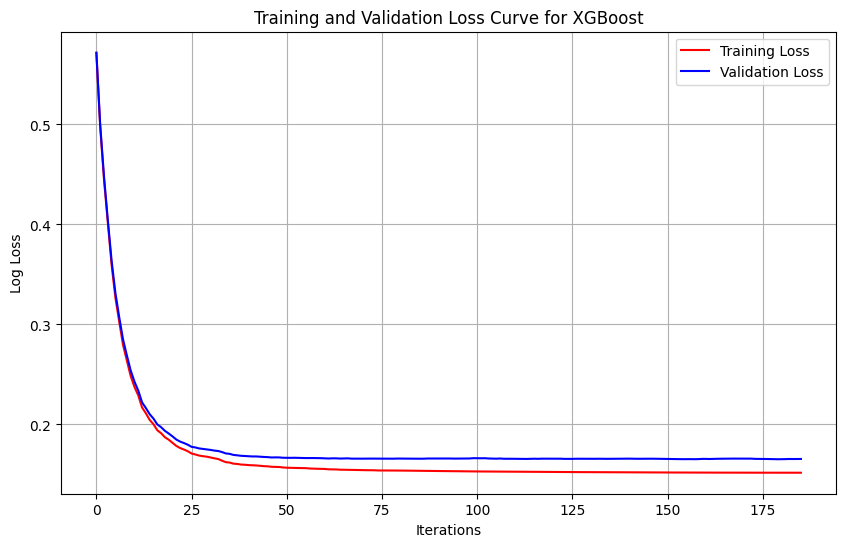

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Define the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=186,
    learning_rate=0.1713924, 
    max_depth=5, 
    min_child_weight=1, 
    subsample=0.7256690687623746, 
    colsample_bytree=0.8196526102180001, 
    gamma=0.010950425456138637, 
    alpha=0,
    eval_metric="logloss"  # Log loss as the evaluation metric
)

# Fit the model while tracking training and validation loss
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Extract loss values
results = xgb_model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss", color="r")
plt.plot(test_loss, label="Validation Loss", color="b")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Training and Validation Loss Curve for XGBoost")
plt.legend()
plt.grid()
plt.show()


In [10]:
y_true = y_train
y_pred = model.predict(X_train)

In [11]:
cm = confusion_matrix(y_true, y_pred)


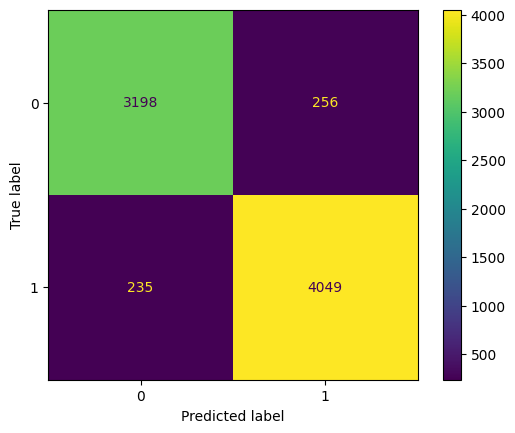

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.show()


In [13]:
X_test.head()

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic
4131,1,-1,1,1,1,1
3762,-1,1,1,1,0,0
3068,-1,-1,-1,1,-1,0
6146,-1,0,-1,-1,-1,-1
2180,-1,0,1,1,1,1


In [14]:
# from url_extractor import extractor

# url = "https://service-mitld.firebaseapp.com/"

# features = extractor(url)


# values = pd.DataFrame([features], columns=X_train.columns)
# print(values)
# prediction = model.predict(values)



In [15]:
# values.head()

In [ ]:
# if prediction == 0:
#     print("It is a Legitimate Website")
# else:
#     print("It is a Phishing Link")

NameError: name 'prediction' is not defined

In [ ]:
# from joblib import dump

# dump(model, "xgb_model.pkl")